<a href="https://colab.research.google.com/github/AndrewSlutsky/DA/blob/main/lab2DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LIBS**

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# **GET THE DATA**

In [133]:
pulsar_data = pd.read_csv('pulsar_data_train.csv')

In [134]:
pulsar_data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [135]:
pulsar_data.shape

(12528, 9)

# **PREPROCESSING**

In [136]:
pulsar_data.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [137]:
pulsar_data[' Excess kurtosis of the integrated profile'].fillna(pulsar_data[' Excess kurtosis of the integrated profile'].mean(), inplace=True)
pulsar_data[' Standard deviation of the DM-SNR curve'].fillna(pulsar_data[' Standard deviation of the DM-SNR curve'].mean(), inplace=True)
pulsar_data[' Skewness of the DM-SNR curve'].fillna(pulsar_data[' Skewness of the DM-SNR curve'].mean(), inplace=True)


# **VISUALIZATION**

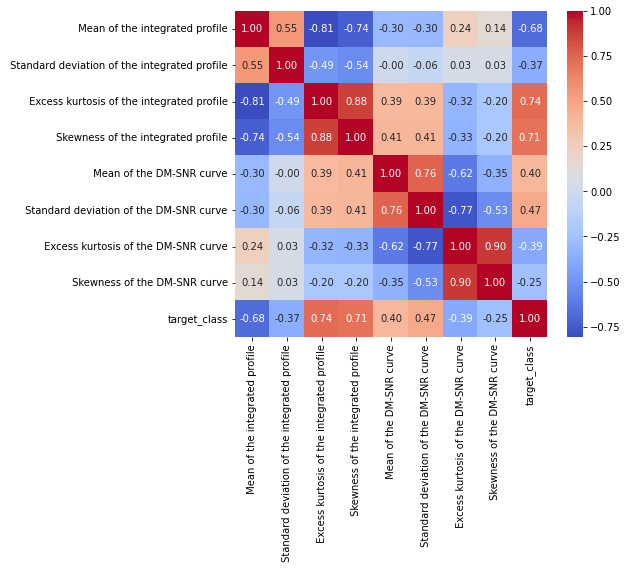

In [108]:
corr = pulsar_data.corr()
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(corr,  cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

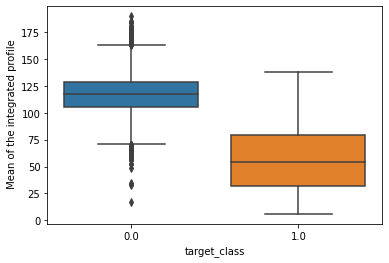

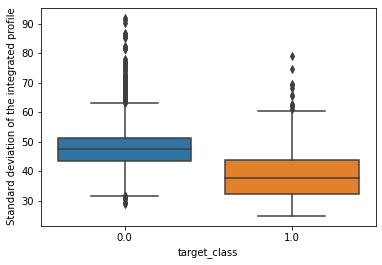

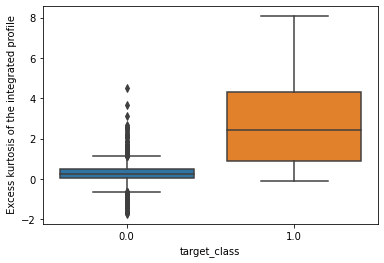

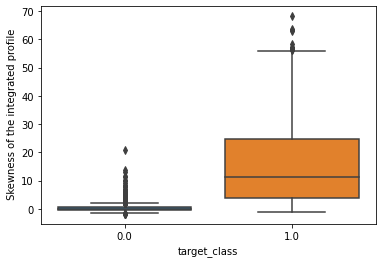

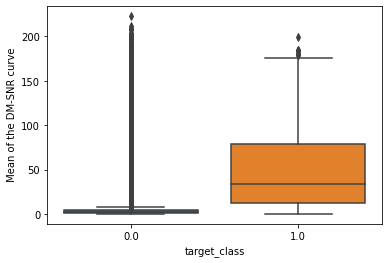

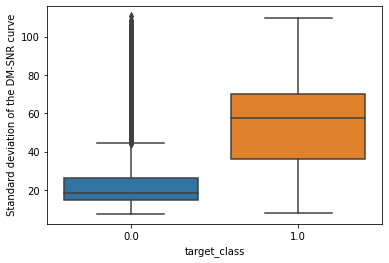

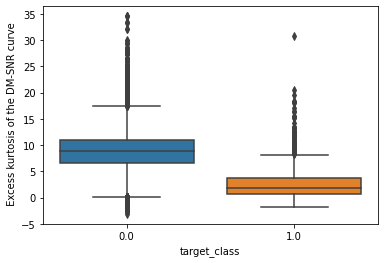

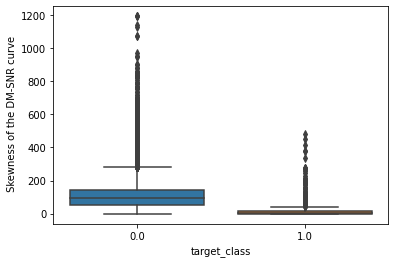

In [109]:
columns = pulsar_data.columns
for i in range(len(columns) - 1):
    figure = plt.figure()
    ax = sns.boxplot(x='target_class', y=columns[i], data=pulsar_data)

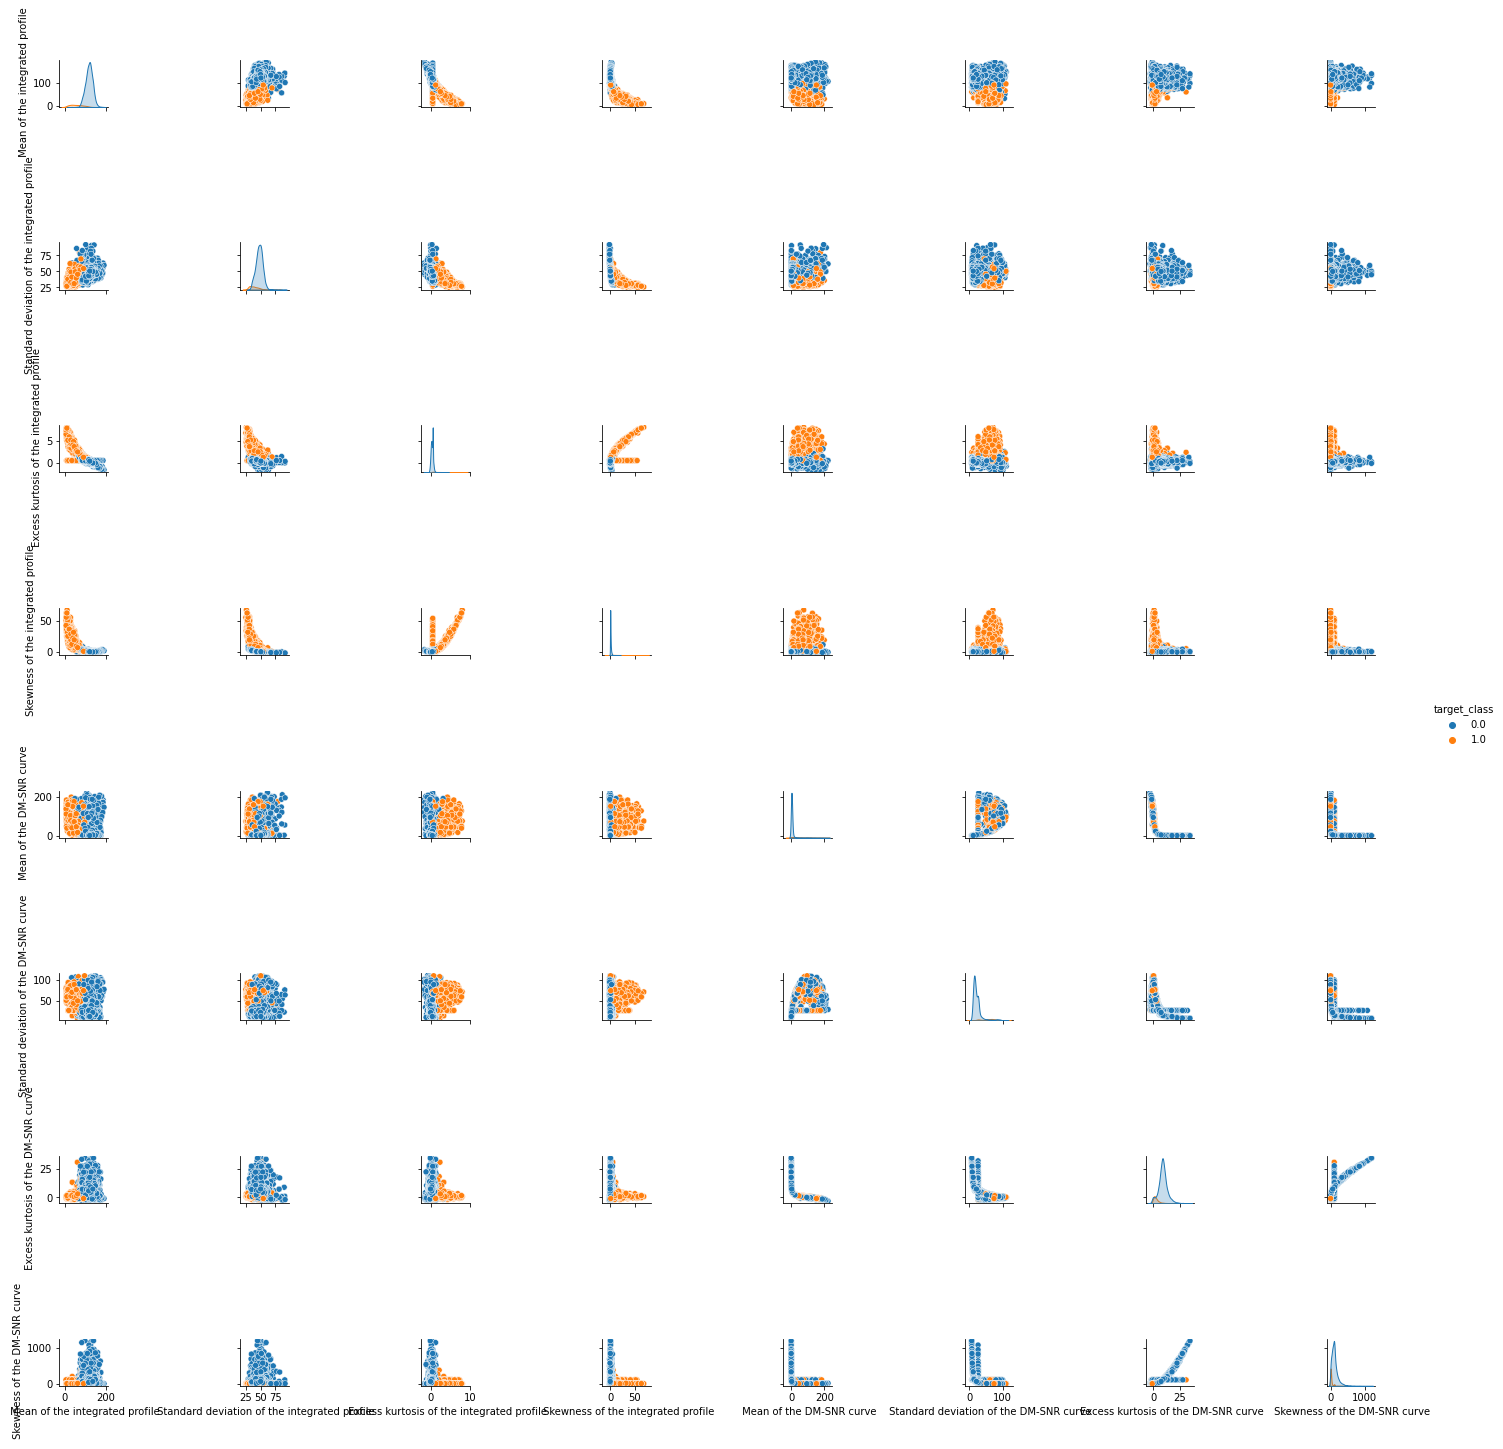

In [110]:
sns.pairplot(pulsar_data, hue="target_class")

# **TRAIN TEST SPLIT**

In [138]:
X = pulsar_data.drop(['target_class'], axis=1)
y = pulsar_data['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# **NORMALIZATION**

In [139]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

# **KNN**

In [140]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

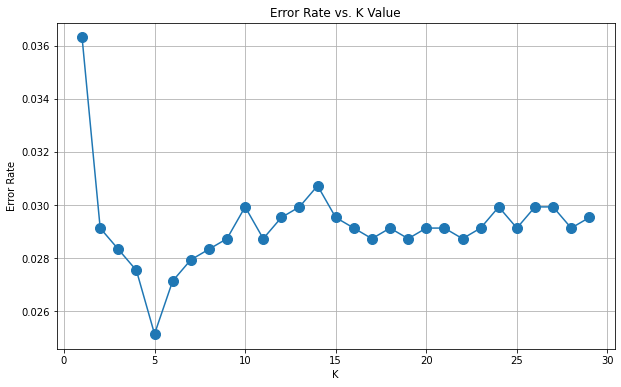

In [141]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [142]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test,pred))
print()
print(classification_report(y_test,pred))

[[2232   16]
 [  59  199]]

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      2248
         1.0       0.93      0.77      0.84       258

    accuracy                           0.97      2506
   macro avg       0.95      0.88      0.91      2506
weighted avg       0.97      0.97      0.97      2506



# **Decision Tree**

In [143]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [144]:
model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [145]:
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[2187   61]
 [  55  203]]

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97      2248
         1.0       0.77      0.79      0.78       258

    accuracy                           0.95      2506
   macro avg       0.87      0.88      0.88      2506
weighted avg       0.95      0.95      0.95      2506



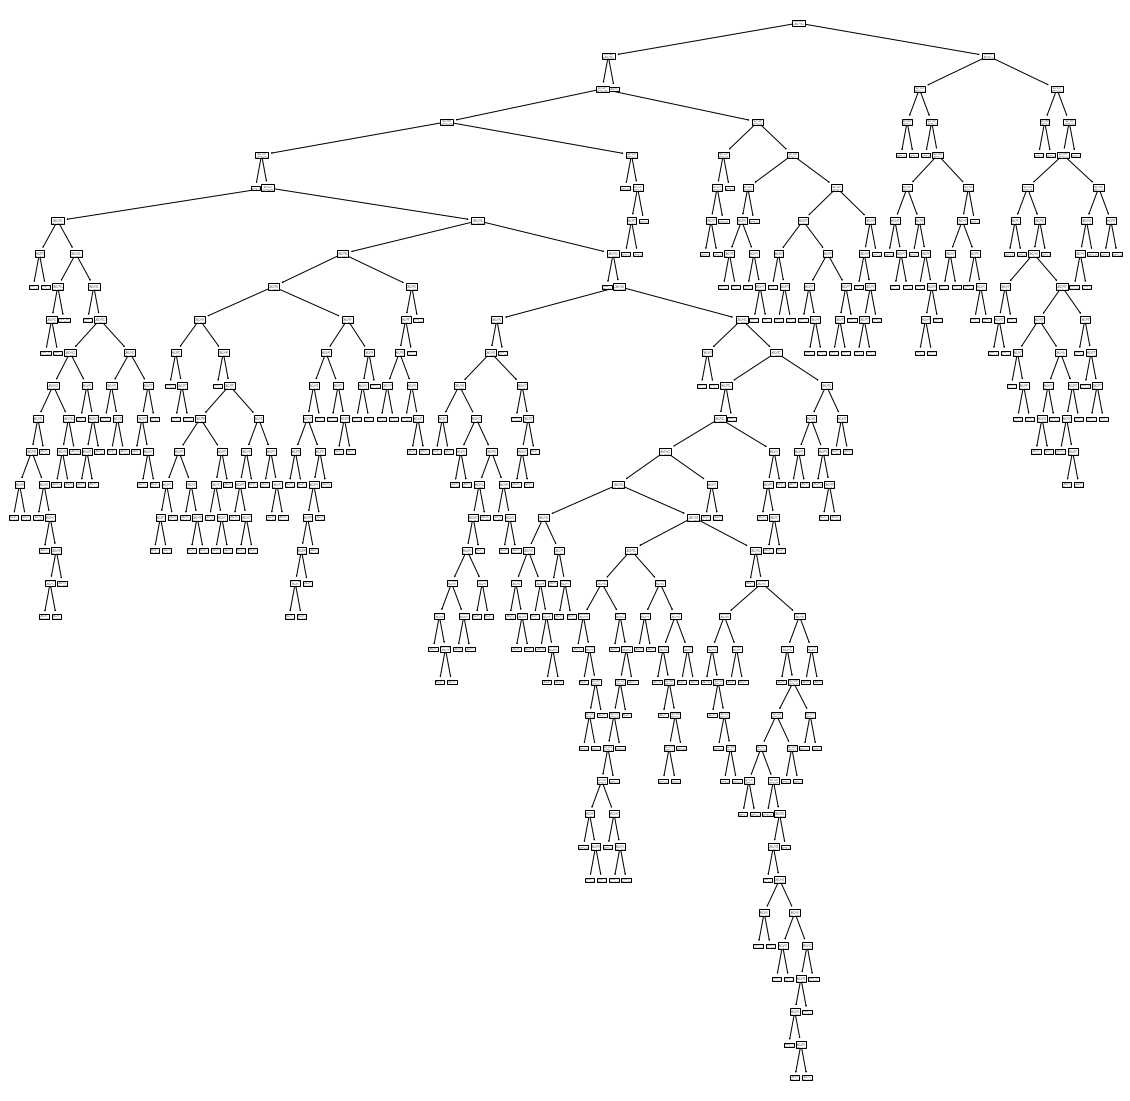

In [146]:
plt.figure(figsize = (20, 20))
plot_tree(model)
plt.show()

# **SVM**

In [147]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [148]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [149]:
grid = GridSearchCV(SVC(), param_grid, refit=True)

In [150]:
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [151]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [152]:
grid_predictions = grid.predict(X_test)

In [153]:
print(confusion_matrix(y_test,grid_predictions))
print()
print(classification_report(y_test,grid_predictions))

[[2237   11]
 [  54  204]]

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2248
         1.0       0.95      0.79      0.86       258

    accuracy                           0.97      2506
   macro avg       0.96      0.89      0.92      2506
weighted avg       0.97      0.97      0.97      2506



# **Random Forest**

In [168]:
from sklearn.ensemble import RandomForestClassifier

In [178]:
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8]
}

In [179]:
CV_rfc = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, refit=True)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [180]:
CV_rfc.best_params_

{'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100}

In [181]:
rfc1=RandomForestClassifier(random_state=42, criterion='gini', max_depth=8, max_features='log2')
rfc1.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [182]:
y_pred = rfc1.predict(X_test)


In [183]:
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[2234   14]
 [  48  210]]

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2248
         1.0       0.94      0.81      0.87       258

    accuracy                           0.98      2506
   macro avg       0.96      0.90      0.93      2506
weighted avg       0.97      0.98      0.97      2506



# **AdaBoost**

In [184]:
from sklearn.ensemble import AdaBoostClassifier

In [186]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate':[.001,0.01,.1]
}

In [187]:
grid = GridSearchCV(AdaBoostClassifier(), param_grid=param_grid, refit=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [100, 200, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [188]:
grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [189]:
AB = AdaBoostClassifier(learning_rate=0.1, n_estimators=500)
AB.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=500, random_state=None)

In [190]:
y_pred = AB.predict(X_test)

In [191]:
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[2232   16]
 [  54  204]]

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      2248
         1.0       0.93      0.79      0.85       258

    accuracy                           0.97      2506
   macro avg       0.95      0.89      0.92      2506
weighted avg       0.97      0.97      0.97      2506

